In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
from sklearn.model_selection import train_test_split


# Seaborn default configuration
sns.set_style("darkgrid")

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

# filter all warnings
warnings.filterwarnings('ignore') 

# set max column to 999 for displaying in pandas
pd.options.display.max_columns=999 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_features = iris.feature_names

In [5]:
df_data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['Species'])
data=pd.concat([df_data,df_labels],axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


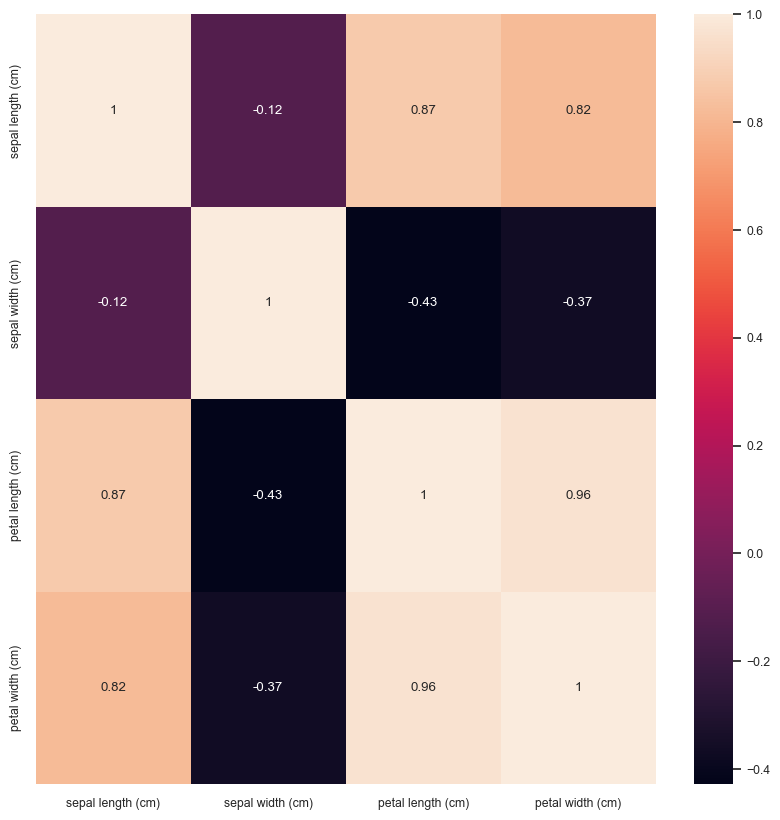

In [30]:
df_corr = data.corr()
plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = True)
plt.show()

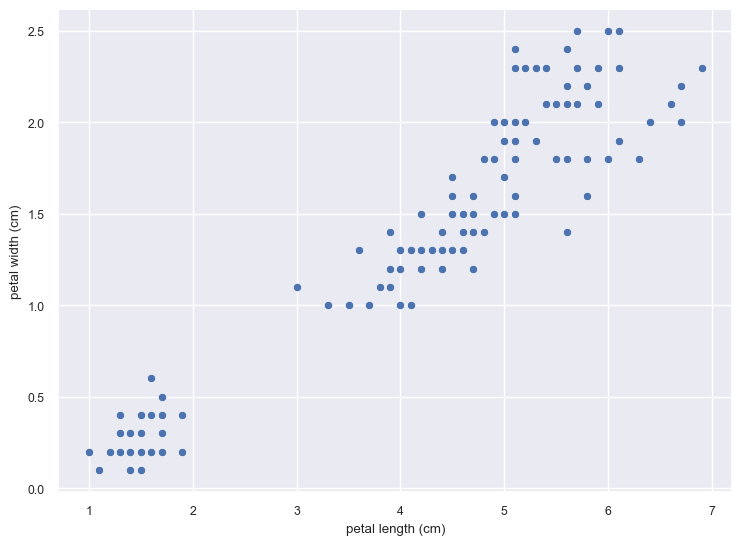

In [32]:
sns.scatterplot(x='petal length (cm)', y = 'petal width (cm)', data = data)
plt.show()

In [8]:
data = data.drop(['Species'], axis = 1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X_data = data.drop(['petal width (cm)'], axis = 1)
y_data = data['petal width (cm)']

In [23]:
X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size = 0.2)

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
print ("==================================")
print (" ACCURACY OF OTHER ML REGRESSION" )
print ("==================================")

 ACCURACY OF OTHER ML REGRESSION


In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

print('----------LinearRegression----------')
lr = LinearRegression()
lr.fit(train_scaled, y_train)

lr_preds = lr.predict(test_scaled)
mse = np.sqrt(mean_squared_error(lr_preds, y_test))
print('평균제곱근오차', mse)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

----------LinearRegression----------
평균제곱근오차 0.8434342720081823
MSE : 0.843, RMSE: 0.918
Variance score : -0.008


<Figure size 870x627 with 0 Axes>

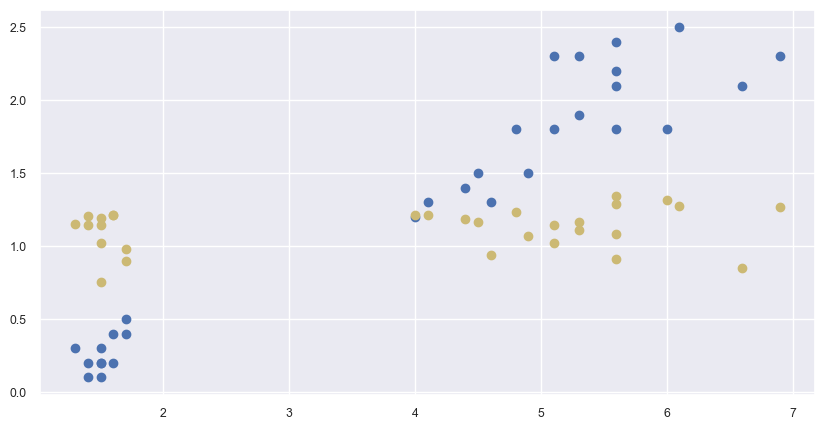

In [33]:
plt.clf()
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['petal length (cm)'], lr_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        

In [ ]:
petal length (cm)

In [26]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_scaled, y_train)

print('----------DecisionTreeRegressor----------')
dy_preds = model.predict(test_scaled)

mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

----------DecisionTreeRegressor----------
평균제곱근오차 1.2067863660703717
MSE : 1.207, RMSE: 1.099
Variance score : -0.008


<Figure size 870x627 with 0 Axes>

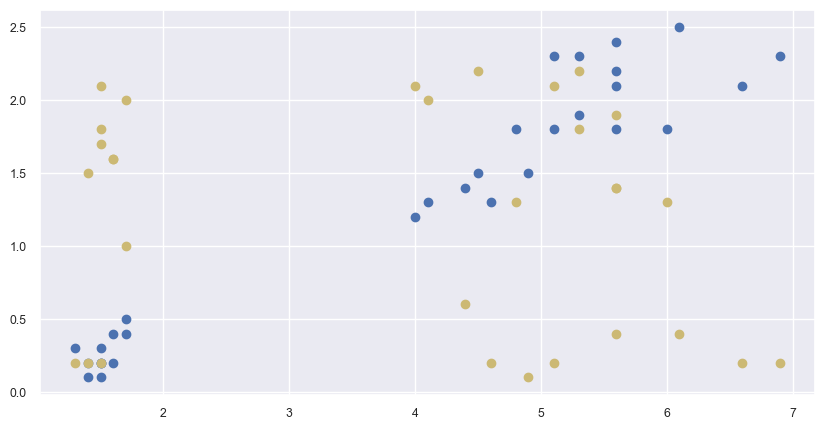

In [34]:
plt.clf()
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['petal length (cm)'], dy_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_scaled, y_train)

print('----------RandomForestRegressor----------')

ry_preds = model.predict(test_scaled)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

----------RandomForestRegressor----------
평균제곱근오차 0.9421716281538877
MSE : 0.942, RMSE: 1.099
Variance score : -0.008


<Figure size 870x627 with 0 Axes>

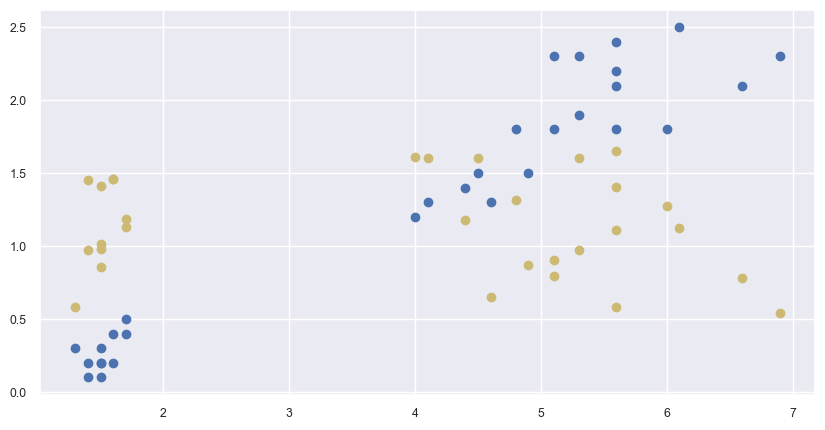

In [35]:
plt.clf()
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['petal length (cm)'], ry_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        

In [28]:
from sklearn import svm

model.fit(train_scaled, y_train)

print('----------svm----------')

sy_preds = model.predict(test_scaled)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

----------svm----------
평균제곱근오차 0.9433099517322165
MSE : 0.943, RMSE: 1.099
Variance score : -0.008


<Figure size 870x627 with 0 Axes>

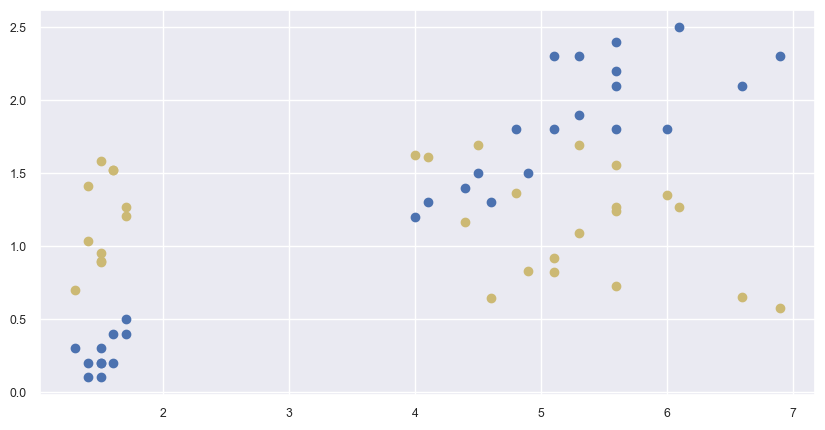

In [36]:
plt.clf()
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['petal length (cm)'], sy_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        